# Exp-7

Write a pytho program to compute an image histogram and perform pixel manupulation like inversion, brightness, adjustment and thresholding

- find entropy of a image

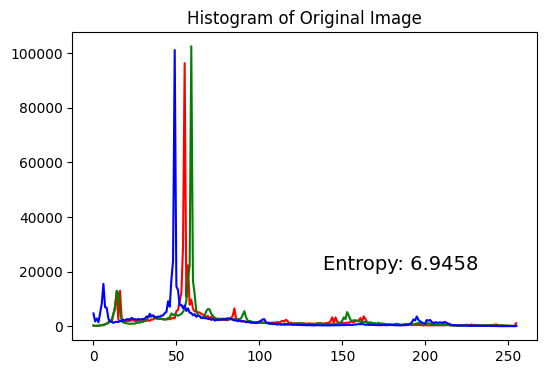

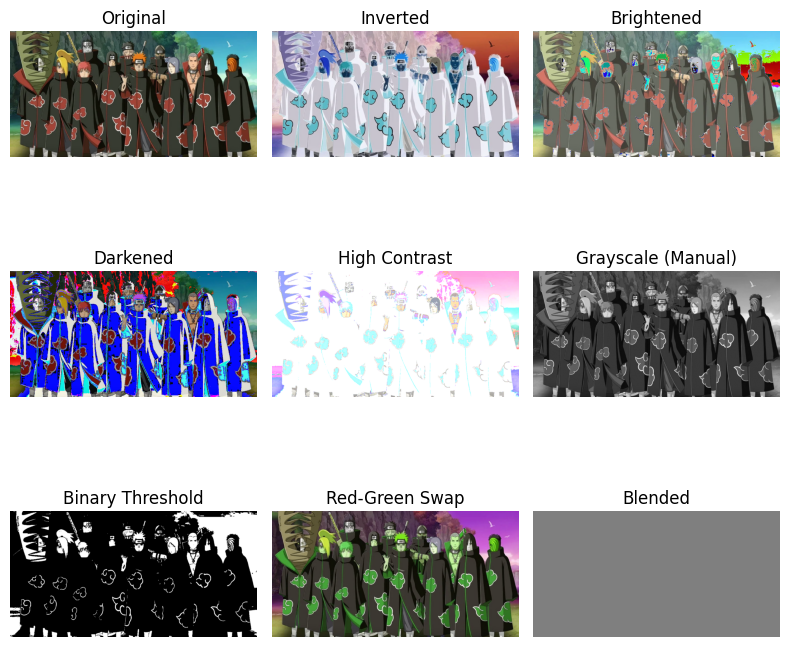

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load image
image = cv2.imread("image.jpg")  # Replace with your image file path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Function to compute and plot histogram
def plot_histogram(image):
    colors = ('r', 'g', 'b')  # RGB Channels

    # 8. Compute Entropy of Original Image
    image_entropy = compute_entropy(image)

    plt.figure(figsize=(6, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Histogram of Original Image")
    
    # Display Entropy
    plt.subplot(2, 3, 6)
    plt.text(0.5, 0.5, f'Entropy: {image_entropy:.4f}', fontsize=14, ha='center')
    plt.axis('off')
    
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    plt.show()

# Function to compute image entropy
def compute_entropy(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    hist_norm = hist / hist.sum()  # Normalize histogram
    return entropy(hist_norm, base=2)

# Plot histogram of original image
plot_histogram(image)

# 1. Color Inversion (Manually)
inverted_image = 255 - image

# 2. Brightness Increase/Decrease (Manually)
bright_image = np.clip(image + 50, 0, 255).astype(np.uint8)
dark_image = np.clip(image - 50, 0, 255).astype(np.uint8)

# 3. Contrast Adjustment (Manually)
contrast_factor = 1.5
contrast_image = np.clip(contrast_factor * (image - 128) + 128, 0, 255).astype(np.uint8)

# 4. Grayscale Conversion (Manually using Luminance Formula)
gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# 5. Manual Thresholding
threshold = 127
binary_thresh = np.where(gray_image > threshold, 255, 0).astype(np.uint8)

# 6. Color Channel Swaps (Red-Green swap)
swapped_image = image.copy()
swapped_image[:, :, [0, 1]] = swapped_image[:, :, [1, 0]]  # Swap Red & Green

# 7. Pixel-wise Image Blending (Original + Inverted)
alpha = 0.5
blended_image = np.clip(alpha * image + (1 - alpha) * inverted_image, 0, 255).astype(np.uint8)

# Plot all manipulated images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

titles = [
    "Original", "Inverted", "Brightened",
    "Darkened", "High Contrast", "Grayscale (Manual)",
    "Binary Threshold", "Red-Green Swap", "Blended"
]

images = [
    image, inverted_image, bright_image,
    dark_image, contrast_image, gray_image,
    binary_thresh, swapped_image, blended_image
]

# Display images
for i in range(len(images)):
    cmap = "gray" if len(images[i].shape) == 2 else None
    axes[i].imshow(images[i], cmap=cmap)
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def calculate_entropy_from_histogram(image):
    """Compute entropy using histogram values."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hist, _ = np.histogram(gray.flatten(), bins=256, range=[0, 256], density=True)
    
    hist = hist[hist > 0]  # Remove zero values to avoid log(0) errors
    return -np.sum(hist * np.log2(hist))  # Shannon entropy formula

# Load Image
image_path = "image.jpg"  # Change this to your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image file.")
else:
    entropy_value = calculate_entropy_from_histogram(image)
    print(f"Image Entropy: {entropy_value:.4f}")


Image Entropy: 6.4747
